In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sp

# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [2]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

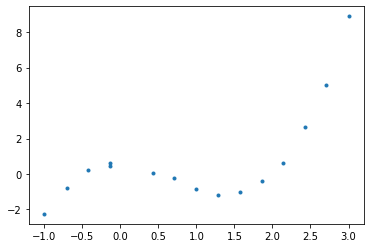

In [3]:
plt.plot(x, y, '.')

На глаз кажется, что кубический многочлен. Давайте проверим.

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [4]:
def matrix_poly(x, m):
#     x - входные данные. m - максимальная степень полинома
    x = np.array(x)
    A = np.array([x**i for i in range(m)])
    A = A.T # это надо чтобы привести к виду, когда надо вектор параметров
    #умножать справа, так привычней
    return A

In [5]:
def least(x, y, m): #тупо следуем за лектором и его решением
    A = matrix_poly(x, m)
    y = np.array(y)
    beta = np.linalg.solve(A.T@A, A.T@y)
    return beta, np.linalg.norm(y - A@beta)

[ 0.49483598 -0.26983377 -2.01973166  1.01540301] 0.38684724271575216


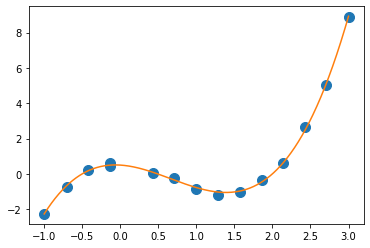

In [6]:
aa, stress = least(x, y, 4)
fun = lambda x: np.polyval(np.flip(aa), x) #я поставил коэф в порядке возрастания,
# а разработчики numpy похоже любят порядок убывания. Придется флипать
print(aa, stress)
xx = np.linspace(-1, 3, 1000)
plt.plot(x, y, '.', markersize = 20)
plt.plot(xx, fun(xx))

In [7]:
np.flip(np.polyfit(x, y, 3)) #это решение из коробки

array([ 0.49483598, -0.26983377, -2.01973166,  1.01540301])

Ну вроде работает, давайте искать оптимальный m.
Верхняя граница 16 так как точек всего 15

In [8]:
n = 16
stress = []
for i in np.arange(1, n):
    beta, s = least(x, y, i)
    stress.append(s)

In [9]:
stress

[10.603334066855261,
 7.893226345030712,
 5.647526092771003,
 0.38684724271575216,
 0.37022220816505585,
 0.3549656220020559,
 0.32298192411566906,
 0.3135479772722109,
 0.2845796912520765,
 0.27854312249851754,
 0.2670011197766435,
 0.14668889133126634,
 0.14624346847082548,
 0.14176377896574588,
 0.1414353082764116]

В исходных данных спрятана ловушка. Там есть точки $(-0.14, 0.44), (-0.14, 0.64)$. Понятно, что в точности прогнать через эти две точки никакую однозначную функцию нельзя, так что получить невязку ноль просто невозножно. Даже если бы у нас была идеальная арифметика  
Причем этому методу вообще пофиг, можно $m$ поставить хоть 100, при том, что точек всего 15, он будет просто нулить все ненужное. Метод с QR так не умеет

In [10]:
beta, s = least(x, y, 100)
beta

array([ 4.14945522e-01, -1.20151060e+00, -1.14249689e+00,  7.33198439e+00,
       -3.50700514e+00, -1.22579425e+01,  6.82552400e+00,  9.16318537e+00,
       -6.35253354e+00, -1.90800837e+00,  2.23665796e+00, -4.31568401e-01,
       -2.04507717e-02,  7.60628658e-03,  1.26667141e-03,  1.16040245e-03,
       -8.57569697e-04,  1.02371745e-04, -5.15988626e-05, -7.84046778e-06,
        2.03792735e-06, -4.70884285e-07,  3.64586271e-07,  2.95141739e-07,
        1.15068744e-07,  5.52913704e-09,  6.71450343e-10, -3.11078531e-09,
       -6.23032710e-10, -9.48538513e-11,  1.58130583e-10, -4.80964593e-11,
        1.10363690e-11, -1.01716682e-12, -1.41114581e-12,  2.28127826e-14,
        1.47067481e-13, -3.30941072e-14, -7.40975401e-15, -1.30567163e-15,
        1.71099429e-17, -7.62760470e-16, -4.22664237e-16, -4.78265193e-17,
       -3.96831328e-18,  1.24633970e-17, -3.86810479e-18,  4.96558052e-19,
        1.54390445e-19, -2.17383554e-20,  4.23749992e-20,  1.45409476e-20,
        2.26054070e-21,  

[ 3.08376237e-01 -1.73227588e+00  1.24641879e+00  1.07035063e+01
 -1.79465936e+01 -1.24968366e+01  3.45687821e+01 -7.00616397e+00
 -2.04065421e+01  1.37053846e+01  1.98108693e-01 -2.65905863e+00
  5.71539195e-01  1.81311474e-01 -8.50409890e-02  9.18092205e-03] 0.14142146487402127


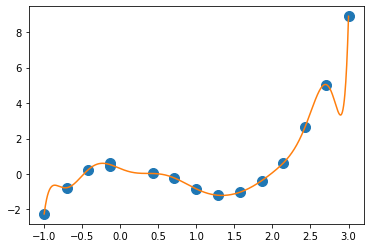

In [11]:
aa, st = least(x, y, 16)
fun = lambda x: np.polyval(np.flip(aa), x) 
print(aa, st)
xx = np.linspace(-1, 3, 1000)
plt.plot(x, y, '.', markersize = 20)
plt.plot(xx, fun(xx))
plt.show()

Удивительно, что-то адекватное получилось

/home/pavel/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


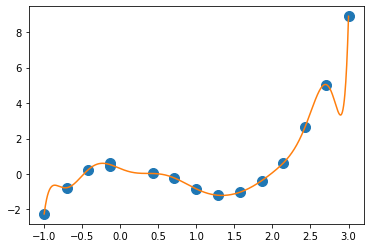

In [12]:
aa2 = np.flip(np.polyfit(x, y, 16)) #это решение из коробки
print()
fun = lambda x: np.polyval(np.flip(aa), x) 
xx = np.linspace(-1, 3, 1000)
plt.plot(x, y, '.', markersize = 20)
plt.plot(xx, fun(xx))
plt.show()

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

Ну невязку мы уже посчитали, надо теперь только поделить на $15 - m$. Само собой последний член мы обрежем, так как на ноль делить нельзя.

In [13]:
n = 15
stress = []
for i in np.arange(1, n):
    beta, s = least(x, y, i)
    stress.append(s/(15-i))
print(np.column_stack((stress, np.arange(1, n))))

[[ 0.757381    1.        ]
 [ 0.60717126  2.        ]
 [ 0.47062717  3.        ]
 [ 0.03516793  4.        ]
 [ 0.03702222  5.        ]
 [ 0.03944062  6.        ]
 [ 0.04037274  7.        ]
 [ 0.04479257  8.        ]
 [ 0.04742995  9.        ]
 [ 0.05570862 10.        ]
 [ 0.06675028 11.        ]
 [ 0.0488963  12.        ]
 [ 0.07312173 13.        ]
 [ 0.14176378 14.        ]]


Как видно, при $m = 4$ последовательность начала обратно расти. Как я и думал, это кубический многочлен

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

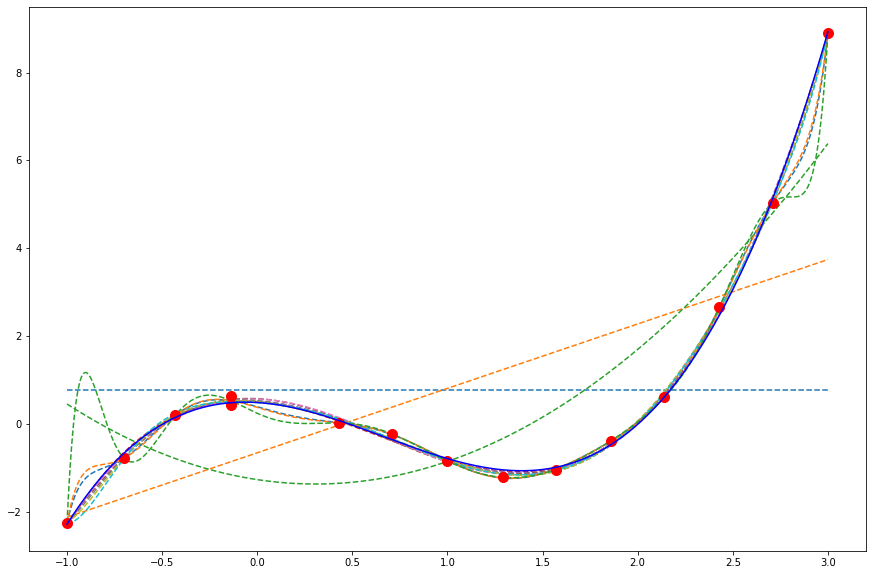

In [14]:
fig, ax = plt.subplots(figsize = (15, 10))
for i in np.delete(np.arange(1, 15), 3):
    a, _ = least(x, y, i)
    fun = lambda x: np.polyval(np.flip(a), x)
    ax.plot(xx, fun(xx), '--')
ax.plot(x, y, '.', markersize = 20, c = 'red')
a, _ = least(x, y, 4)
fun4 = lambda x: np.polyval(np.flip(a), x)
ax.plot(xx, fun4(xx), '-b')
plt.show()

Парабола еще хорошо видна, а все остальное сливается, только полиномы высоких степеней выбиваются. Синия сплошная линия это $m = 4$  

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [15]:
def least_QR(x, y, m): #тупо следуем за лектором и его решением
    A = matrix_poly(x, m)
    y = np.array(y)
    q, R = np.linalg.qr(A, 'complete')
    t = q.T@y
    f = t[:m]
    r = t[m:]
    R1 = R[:m, :]
    beta = sp.solve_triangular(R1, f)
    return beta, np.linalg.norm(r)

[ 0.49483598 -0.26983377 -2.01973166  1.01540301] 0.38684724271575066


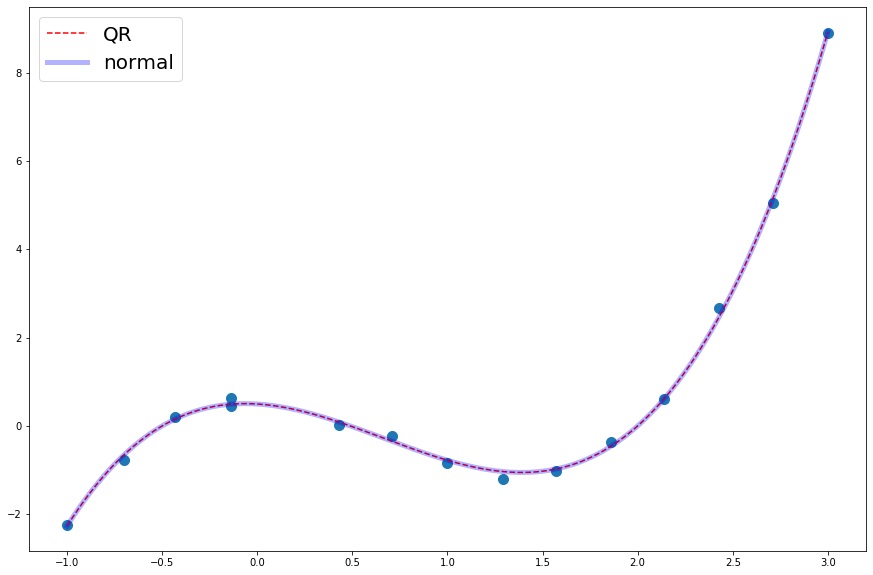

In [16]:
aa, stress = least_QR(x, y, 4)
fun = lambda x: np.polyval(np.flip(aa), x)
print(aa, stress)
a2, stress = least(x, y, 4)
fun2 = lambda x: np.polyval(np.flip(a2), x)
xx = np.linspace(-1, 3, 1000)
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(x, y, '.', markersize = 20)
ax.plot(xx, fun(xx), ls = '--', c = 'r', label = 'QR')
ax.plot(xx, fun2(xx), label = 'normal', c = 'b', alpha = 0.3, lw = 5)
ax.legend(fontsize = 20)
plt.show()

In [17]:
%timeit least(x, y, 4)

48.1 µs ± 1.19 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [18]:
%timeit least_QR(x, y, 4)

115 µs ± 6.17 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Ну вроде совпадают, на глаз не различить

[-1.17383678e+08 -4.26344284e+08  3.32198337e+09 -2.79245039e+08
 -1.85266550e+10  2.32517150e+10  1.67053717e+10 -5.30901867e+10
  3.18038570e+10  1.28037643e+10 -2.78788562e+10  1.68884050e+10
 -5.25102794e+09  8.51891818e+08 -5.72892951e+07] 0.0


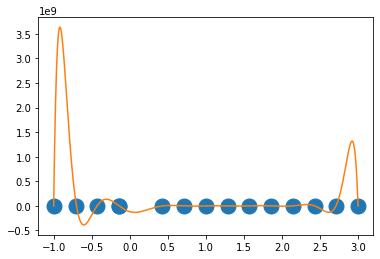

In [19]:
aa, stress = least_QR(x, y, 15)
fun = lambda x: np.polyval(np.flip(aa), x) 
print(aa, stress)
xx = np.linspace(-1, 3, 1000)
plt.plot(x, y, '.', markersize = 30)
plt.plot(xx, fun(xx))
plt.show()

Безумие какое-то. Почему-то метод через QR работает на больших $m$ хуже не только чем метод из коробки, но даже хуже решения в лоб. Ну а так, вроде совпадают.

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

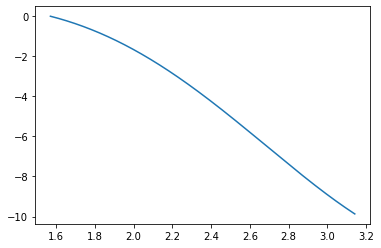

In [20]:
x = np.linspace(np.pi/2, np.pi, 1000)
plt.plot(x, x**2*np.cos(x))

Напишем функцию, которая будет по точкам строить лагранжев полином. Пусть на вход идут точки, значения в них, и точки на которых надо полином посчитать, а выходит значения полинома.
Для этого сначала напишем мини-фунцию, которая будет считать значение на базисных функциях, в терминологии лектора это $l_k$

In [21]:
def basis(x, a, k):
    res = np.ones_like(a)
    for i in np.delete(np.arange(len(x)), k):
        res = res*(a - x[i])/(x[k] - x[i])
    return(res)

In [22]:
def Lagrange(x, y, r):
    m = len(x)
    B = np.zeros((len(r), m))
    for k in range(m):
        B[:, k] = basis(x, r, k)
    return B@y

B это такая матрица, что $B_{jk} = l_k(r_i)$ где $r_i$ это вектор на котором я хочу вычислить полином. Соответственно basis вычисляет столбцы матрицы B, а Lagrange просто собирает их вместе и умножает на вектор y.

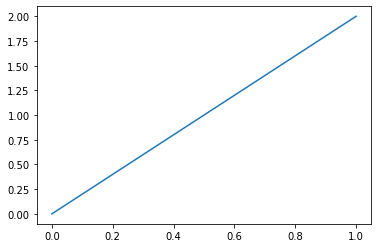

In [23]:
x1 = np.array([0, 1])
y1 = np.array([0, 2])
r = np.linspace(0, 1, 100)
plt.plot(r, Lagrange(x1, y1, r))

Теперь мы готовы сделать задание.

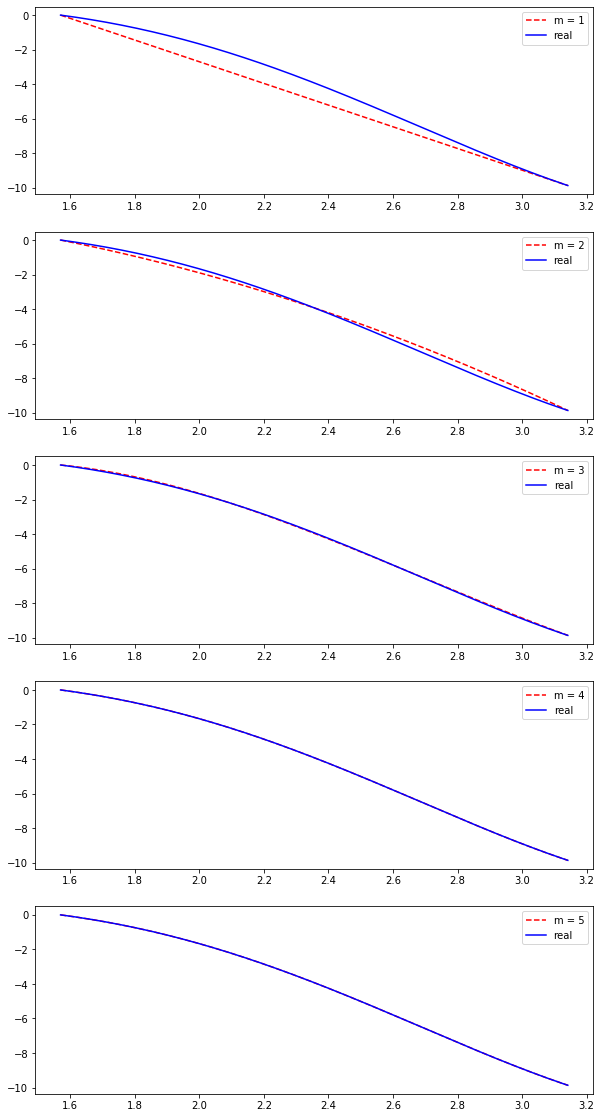

In [24]:
r = np.linspace(np.pi/2, np.pi, 200)
a = r**2*np.cos(r)
fig, axes = plt.subplots(5, figsize = (10 , 20))
for i in range(5):
    x = np.linspace(np.pi/2, np.pi, i +2)
    y = x**2*np.cos(x)
    num = 'm = ' + str(i+1)
    axes[i].plot(r, Lagrange(x, y, r), 'r--', label = num)
    axes[i].plot(r, a, 'b', label = 'real')
    #axes[i].plot(r, np.abs(Lagrange(x, y, r) - r**2*np.cos(r)), 'g', label = 'error')
    axes[i].legend()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

Я просто переписал формулу для узлов Чевышева из вики

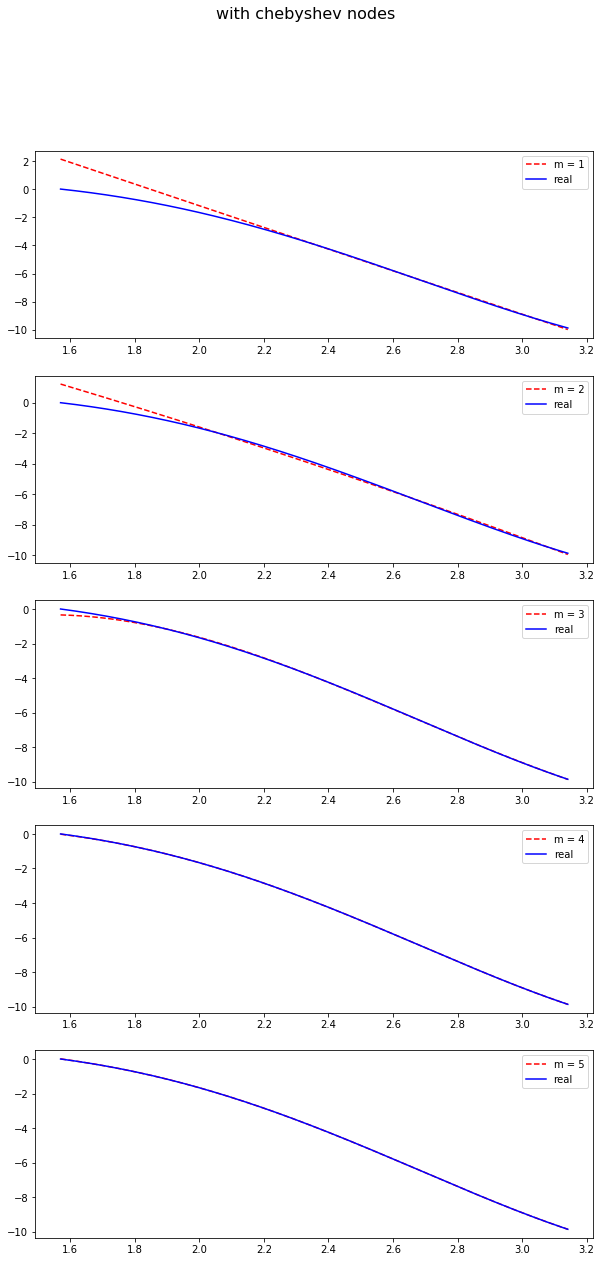

In [25]:
r = np.linspace(np.pi/2, np.pi, 200)
a = r**2*np.cos(r)
fig, axes = plt.subplots(5, figsize = (10 , 20))
fig.suptitle('with chebyshev nodes', fontsize = 16)
for i in range(5):
    x = 3*np.pi/4 + np.pi/4 *np.cos((2*np.arange(1, i+3) - 1)/(2*i+6) *np.pi)
    y = x**2*np.cos(x)
    num = 'm = ' + str(i+1)
    axes[i].plot(r, Lagrange(x, y, r), 'r--', label = num)
    axes[i].plot(r, a, 'b', label = 'real')
    #axes[i].plot(r, np.abs(Lagrange(x, y, r) - r**2*np.cos(r)), 'g', label = 'error')
    axes[i].legend()    

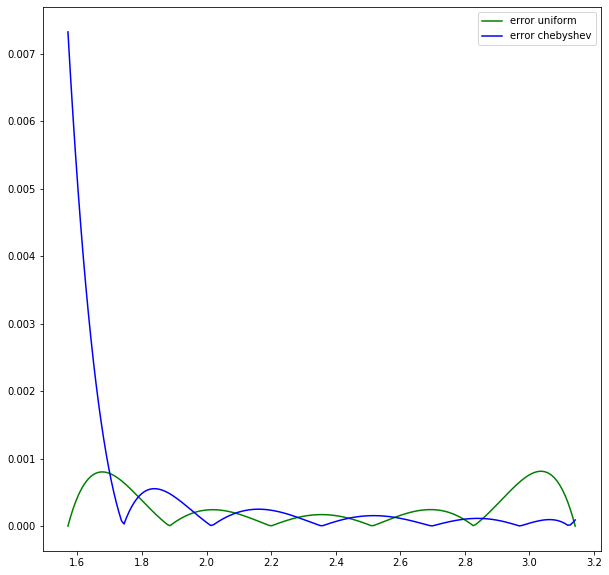

In [26]:
r = np.linspace(np.pi/2, np.pi, 200)
a = r**2*np.cos(r)
fig, axes = plt.subplots( figsize = (10 , 10))
x1 = 3*np.pi/4 + np.pi/4 *np.cos((2*np.arange(1, i+3) - 1)/(2*i+6) *np.pi)
x2 = np.linspace(np.pi/2, np.pi, i +2)
y1 = x1**2*np.cos(x1)
y2 = x2**2*np.cos(x2)
axes.plot(r, np.abs(Lagrange(x2, y2, r) - r**2*np.cos(r)), 'g', label = 'error uniform')
axes.plot(r, np.abs(Lagrange(x1, y1, r) - r**2*np.cos(r)), 'b', label = 'error chebyshev')
axes.legend()

In [27]:
range(5)

range(0, 5)

In [30]:
(9.27e-23*3*np.sqrt(3)/(32*7.87))**(1/3)

1.2413063255673975e-08